# Import Libraries

In [2]:
# Working with data
import pandas as pd 
import numpy as np

# sklearn libraryies
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score, roc_auc_score

# ML Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-notebook')

from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

import os 
os.chdir("D:\Data Science\Datasets\Titanic")

In [3]:
# importing train and test dataset
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Exploratory Analysis

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
print("Train Dimension : {}\n Test Dimension : {}".format(train_df.shape, test_df.shape))

Train Dimension : (891, 12)
 Test Dimension : (418, 11)


# Features:
* survival: Survival
* PassengerId: Unique Id of a passenger
* pclass: Ticket class
* sex: Sex
* Age: Age in years
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Missing value analysis

In [11]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis=1, keys = ['Total', "%"])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [12]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# is there a correlation between port of embarkment and survival

In [13]:
train_df['Embarked'].value_counts()/len(train_df)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

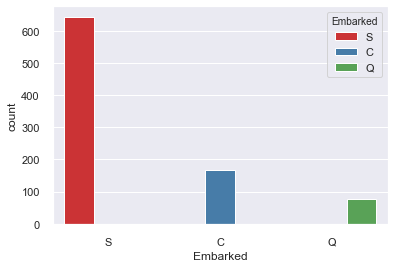

In [14]:
sns.set(style='darkgrid')
sns.countplot(x = 'Embarked', data = train_df, hue = 'Embarked', palette = "Set1")

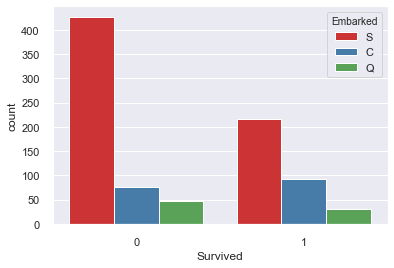

In [15]:
sns.set(style='darkgrid')
sns.countplot(x = 'Survived', data = train_df, hue = 'Embarked', palette="Set1")

In [16]:
train_df.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


# Does survival depend on gender?

In [17]:
train_df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


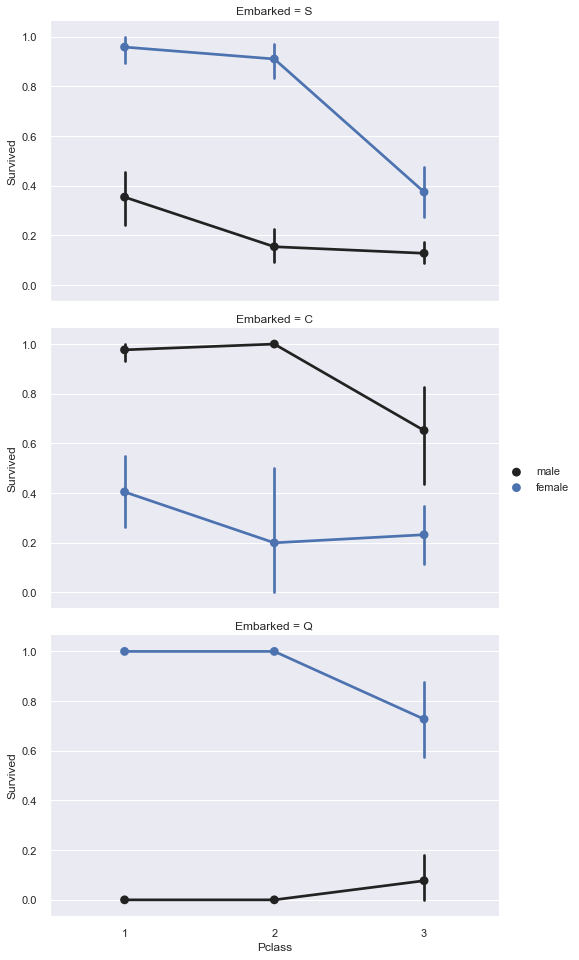

In [18]:
FacetGrid = sns.FacetGrid(train_df, row="Embarked", size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
FacetGrid.add_legend();

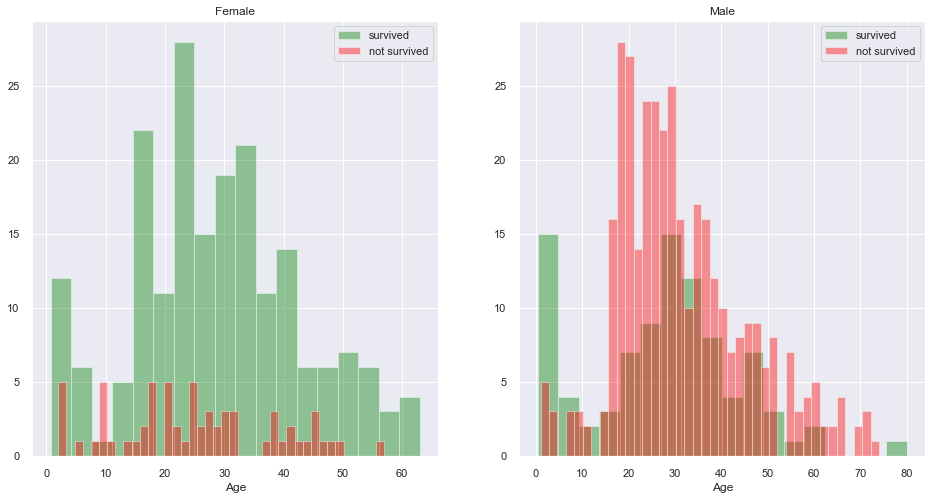

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

# Pclass 

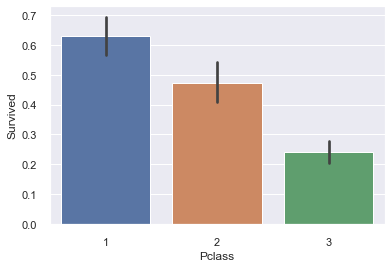

In [20]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

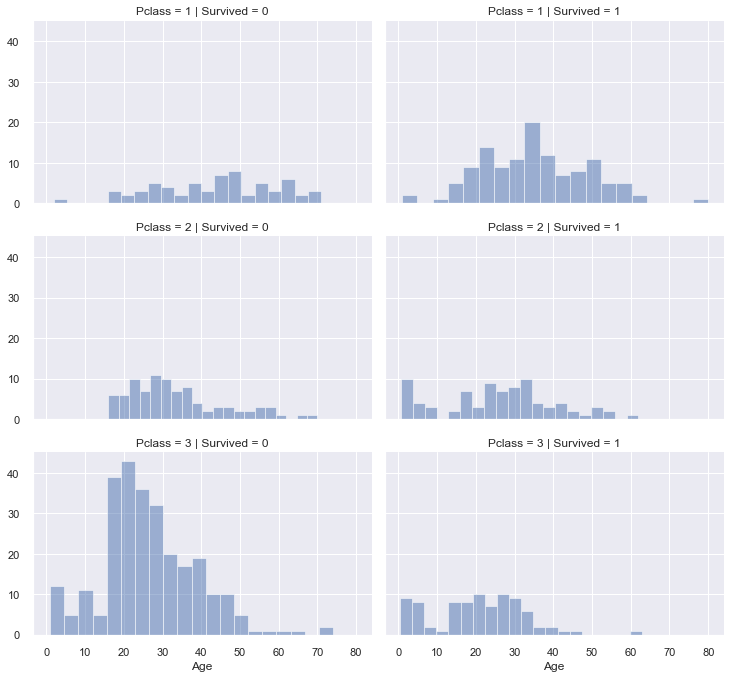

In [21]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.
SibSp and Parch
SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [22]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'yes'
    
train_df['travelled_alone'].value_counts()

yes    537
No     354
Name: travelled_alone, dtype: int64

In [23]:
test_df['travelled_alone'].value_counts()

yes    253
No     165
Name: travelled_alone, dtype: int64

In [24]:
train_df['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

Q3: Do the passengers have better chance at survival while travelling alone?¶


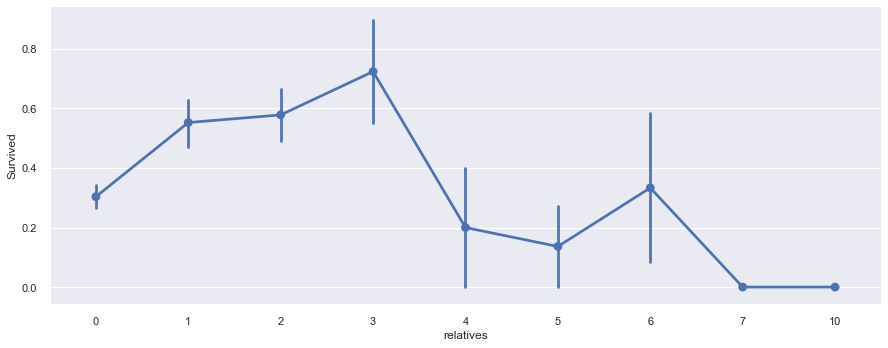

In [25]:
axes = sns.factorplot('relatives', 'Survived', data=train_df, aspect=2.5)

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing


Missing Data
<br>
Cabin:
<br>
Cabin number looks like ‘C23’ and the letter refers to the deck. We will extract these and create a new feature, to represent a persons deck.

In [26]:
train_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [27]:
import re
deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna("U")
    #dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [28]:
train_df.groupby("Deck").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
Deck,,,,,,,,
A,439.600000,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.266667
B,521.808511,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.936170
C,406.440678,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,1.118644
D,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.727273
E,502.437500,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.625000
F,370.384615,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,1.076923
G,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.750000
U,443.058140,0.299419,2.636628,27.588208,0.546512,0.364826,19.181079,0.911337


In [29]:
test_df['Deck'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64

Age:
<br>
<br>
Fill null values with random numbers, which are computed based on the mean age value in regards to the standard deviation.¶

In [30]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [31]:
train_df["Age"].isnull().sum()

0

In [32]:
test_df["Age"].isnull().sum()

0

In [33]:
train_df['Age'].describe()

count    891.000000
mean      29.424242
std       13.478640
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

# Embarked

In [34]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
train_df["Embarked"].mode()

0    S
dtype: object

In [36]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [37]:
train_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


Converting Features¶
<br>
<br>
Fare: Convert from float to int

In [38]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)

In [39]:
train_df['Fare'].isnull().sum()

0

In [40]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null int64
Embarked           891 non-null object
relatives          891 non-null int64
travelled_alone    891 non-null object
Deck               891 non-null object
dtypes: int32(1), int64(7), object(6)
memory usage: 94.1+ KB


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                418 non-null int32
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               418 non-null int64
Embarked           418 non-null object
relatives          418 non-null int64
travelled_alone    418 non-null object
Deck               418 non-null object
dtypes: int32(1), int64(6), object(6)
memory usage: 40.9+ KB


Name: Extract titles from name and build a new feature from that¶

In [43]:
train_titles = train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
type(train_titles)

pandas.core.series.Series

In [44]:
train_titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Don           1
Jonkheer      1
Capt          1
Countess      1
Sir           1
Mme           1
Name: Name, dtype: int64

In [45]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    #dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna("NA")
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [46]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone,Deck,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,1,No,U,Mr
1,2,1,1,female,38,1,0,PC 17599,71,C,1,No,C,Mrs
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,yes,U,Miss
3,4,1,1,female,35,1,0,113803,53,S,1,No,C,Mrs
4,5,0,3,male,35,0,0,373450,8,S,0,yes,U,Mr
5,6,0,3,male,33,0,0,330877,8,Q,0,yes,U,Mr
6,7,0,1,male,54,0,0,17463,51,S,0,yes,E,Mr
7,8,0,3,male,2,3,1,349909,21,S,4,No,U,Master
8,9,1,3,female,27,0,2,347742,11,S,2,No,U,Mrs
9,10,1,2,female,14,1,0,237736,30,C,1,No,U,Mrs


In [47]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone,Deck,Title
0,892,3,male,22,0,0,330911,7,Q,0,yes,U,Mr
1,893,3,female,38,1,0,363272,7,S,1,No,U,Mrs
2,894,2,male,26,0,0,240276,9,Q,0,yes,U,Mr
3,895,3,male,35,0,0,315154,8,S,0,yes,U,Mr
4,896,3,female,35,1,1,3101298,12,S,2,No,U,Mrs
5,897,3,male,33,0,0,7538,9,S,0,yes,U,Mr
6,898,3,female,54,0,0,330972,7,Q,0,yes,U,Miss
7,899,2,male,2,1,1,248738,29,S,2,No,U,Mr
8,900,3,female,27,0,0,2657,7,C,0,yes,U,Mrs
9,901,3,male,14,2,0,A/4 48871,24,S,2,No,U,Mr


Sex : Convet to numeric

In [48]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
'''
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

'''

'\ngenders = {"male": 0, "female": 1}\ndata = [train_df, test_df]\n\nfor dataset in data:\n    dataset[\'Sex\'] = dataset[\'Sex\'].map(genders)\n\n'

Ticket:

In [50]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [51]:
test_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

Since the Ticket attribute has too many unique values, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.¶

In [52]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

Embarked: Convert to Numeric

In [53]:
'''
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
'''

'\nports = {"S": 0, "C": 1, "Q": 2}\ndata = [train_df, test_df]\n\nfor dataset in data:\n    dataset[\'Embarked\'] = dataset[\'Embarked\'].map(ports)\n    \n'

## Create new features
Age time class

In [54]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

Fare per Person:

In [55]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset["Fare_Per_Person"].astype(np.int64)

Creating Categories:
<br>
Age: Convert from float to int and create a new feature "AgeGroup" using bins

In [56]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
    dataset['Age'] = dataset['Age'].astype(str)
    dataset.loc[ dataset['Age'] == '0', 'Age'] = "Children"
    dataset.loc[ dataset['Age'] == '1', 'Age'] = "Teens"
    dataset.loc[ dataset['Age'] == '2', 'Age'] = "Youngsters"
    dataset.loc[ dataset['Age'] == '3', 'Age'] = "Young Adults"
    dataset.loc[ dataset['Age'] == '4', 'Age'] = "Adults"
    dataset.loc[ dataset['Age'] == '5', 'Age'] = "Middle Age"
    dataset.loc[ dataset['Age'] == '6', 'Age'] = "Senior"
    dataset.loc[ dataset['Age'] == '7', 'Age'] = "Retired"

# let's see how it's distributed 
train_df['Age'].value_counts()

Adults          165
Senior          152
Middle Age      145
Young Adults    144
Youngsters      113
Teens            97
Children         68
Retired           7
Name: Age, dtype: int64

In [57]:
test_df['Age'].value_counts()

Adults          82
Middle Age      69
Young Adults    63
Youngsters      62
Senior          61
Teens           46
Children        33
Retired          2
Name: Age, dtype: int64

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null object
Age                891 non-null object
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int64
Embarked           891 non-null object
relatives          891 non-null int64
travelled_alone    891 non-null object
Deck               891 non-null object
Title              891 non-null object
Age_Class          891 non-null int64
Fare_Per_Person    891 non-null int64
dtypes: int64(9), object(6)
memory usage: 104.5+ KB


Fare: 

In [59]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset['Fare'] = dataset['Fare'].astype(str)
    dataset.loc[ dataset['Fare'] == '0', 'Fare'] = "Extremely Low"
    dataset.loc[ dataset['Fare'] == '1', 'Fare'] = "Very Low"
    dataset.loc[ dataset['Fare'] == '2', 'Fare'] = "Low"
    dataset.loc[ dataset['Fare'] == '3', 'Fare'] = "High"
    dataset.loc[ dataset['Fare'] == '4', 'Fare'] = "Very High"
    dataset.loc[ dataset['Fare'] == '5', 'Fare'] = "Extremely High"

In [60]:
train_df['Fare'].value_counts()

Extremely Low     241
Low               223
Very Low          216
High              158
Very High          44
Extremely High      9
Name: Fare, dtype: int64

In [61]:
test_df['Fare'].value_counts()

Extremely Low     120
Low               102
Very Low           96
High               69
Very High          23
Extremely High      8
Name: Fare, dtype: int64

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null object
Age                891 non-null object
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null object
Embarked           891 non-null object
relatives          891 non-null int64
travelled_alone    891 non-null object
Deck               891 non-null object
Title              891 non-null object
Age_Class          891 non-null int64
Fare_Per_Person    891 non-null int64
dtypes: int64(8), object(7)
memory usage: 104.5+ KB


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Sex                418 non-null object
Age                418 non-null object
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null object
Embarked           418 non-null object
relatives          418 non-null int64
travelled_alone    418 non-null object
Deck               418 non-null object
Title              418 non-null object
Age_Class          418 non-null int64
Fare_Per_Person    418 non-null int64
dtypes: int64(7), object(7)
memory usage: 45.8+ KB


In [64]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,1,0,3,male,Youngsters,1,0,Extremely Low,S,1,No,U,Mr,66,3
1,2,1,1,female,Middle Age,1,0,High,C,1,No,C,Mrs,38,35
2,3,1,3,female,Young Adults,0,0,Extremely Low,S,0,yes,U,Miss,78,7
3,4,1,1,female,Middle Age,1,0,High,S,1,No,C,Mrs,35,26
4,5,0,3,male,Middle Age,0,0,Very Low,S,0,yes,U,Mr,105,8
5,6,0,3,male,Adults,0,0,Very Low,Q,0,yes,U,Mr,99,8
6,7,0,1,male,Senior,0,0,High,S,0,yes,E,Mr,54,51
7,8,0,3,male,Children,3,1,Low,S,4,No,U,Master,6,4
8,9,1,3,female,Young Adults,0,2,Very Low,S,2,No,U,Mrs,81,3
9,10,1,2,female,Teens,1,0,Low,C,1,No,U,Mrs,28,15


Pclass: 

In [65]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [66]:
data = [train_df, test_df]

for dataset in data:
    dataset['Pclass'] = dataset['Pclass'].astype(np.str)
    dataset.loc[dataset['Pclass'] == '1', 'Pclass'] = "Class1"
    dataset.loc[dataset['Pclass'] == '2', 'Pclass'] = "Class2"
    dataset.loc[dataset["Pclass"] == '3', 'Pclass'] = "Class3"

In [67]:
train_df['Pclass'].value_counts()

Class3    491
Class1    216
Class2    184
Name: Pclass, dtype: int64

# Feature Scaling

In [68]:
train_df = train_df.drop(["PassengerId"], axis=1)

In [69]:
train_numerical_features = list(train_df.select_dtypes(include=['int64', 'int32', 'float64']).columns)
train_numerical_features

['Survived', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [70]:
del train_numerical_features[0]

train_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [71]:
# Feature Scaling with Standard Scaler
std_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data=train_df)
train_df_ss[train_numerical_features] = std_scaler.fit_transform(train_df_ss[train_numerical_features])

In [72]:
train_df_ss.shape

(891, 14)

In [73]:
train_df_ss.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,Class3,male,Youngsters,0.432793,-0.473674,Extremely Low,S,0.059160,No,U,Mr,0.049249,-0.459218
1,1,Class1,female,Middle Age,0.432793,-0.473674,High,C,0.059160,No,C,Mrs,-0.773708,0.434090
2,1,Class3,female,Young Adults,-0.474545,-0.473674,Extremely Low,S,-0.560975,yes,U,Miss,0.401946,-0.347554
3,1,Class1,female,Middle Age,0.432793,-0.473674,High,S,0.059160,No,C,Mrs,-0.861882,0.182847
4,0,Class3,male,Middle Age,-0.474545,-0.473674,Very Low,S,-0.560975,yes,U,Mr,1.195512,-0.319638
5,0,Class3,male,Adults,-0.474545,-0.473674,Very Low,Q,-0.560975,yes,U,Mr,1.019164,-0.319638
6,0,Class1,male,Senior,-0.474545,-0.473674,High,S,-0.560975,yes,E,Mr,-0.303447,0.880744
7,0,Class3,male,Children,2.247470,0.767630,Low,S,1.919564,No,U,Master,-1.714232,-0.431302
8,1,Class3,female,Young Adults,-0.474545,2.008933,Very Low,S,0.679295,No,U,Mrs,0.490120,-0.459218
9,1,Class2,female,Teens,0.432793,-0.473674,Low,C,0.059160,No,U,Mrs,-1.067622,-0.124227


In [74]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,Class3,male,Youngsters,0,0,Extremely Low,Q,0,yes,U,Mr,66,7
1,893,Class3,female,Middle Age,1,0,Extremely Low,S,1,No,U,Mrs,114,3
2,894,Class2,male,Young Adults,0,0,Very Low,Q,0,yes,U,Mr,52,9
3,895,Class3,male,Middle Age,0,0,Very Low,S,0,yes,U,Mr,105,8
4,896,Class3,female,Middle Age,1,1,Very Low,S,2,No,U,Mrs,105,4


In [75]:
PassergerId = test_df["PassengerId"].values

In [76]:
test_numerical_features = list(test_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [77]:
del test_numerical_features[0]
test_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [78]:
# Feature scaling - Standard scaler
test_ss_scaler = StandardScaler()
test_df_ss = pd.DataFrame(data = test_df)
test_df_ss[test_numerical_features] = test_ss_scaler.fit_transform(test_df_ss[test_numerical_features])

In [79]:
test_df.shape

(418, 14)

In [80]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,Class3,male,Youngsters,-0.499470,-0.400248,Extremely Low,Q,-0.553443,yes,U,Mr,0.012994,-0.401204
1,893,Class3,female,Middle Age,0.616992,-0.400248,Extremely Low,S,0.105643,No,U,Mrs,1.203433,-0.513662
2,894,Class2,male,Young Adults,-0.499470,-0.400248,Very Low,Q,-0.553443,yes,U,Mr,-0.334218,-0.344975
3,895,Class3,male,Middle Age,-0.499470,-0.400248,Very Low,S,-0.553443,yes,U,Mr,0.980225,-0.373089
4,896,Class3,female,Middle Age,0.616992,0.619896,Very Low,S,0.764728,No,U,Mrs,0.980225,-0.485547


# One-hot encoding

In [81]:
# One-Hot encoding / Dummy variables
encode_col_list = list(train_df.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_df_ss = pd.concat([train_df_ss,pd.get_dummies(train_df_ss[i], prefix=i)],axis=1)
    train_df_ss.drop(i, axis = 1, inplace=True)

In [82]:
train_df_ss.shape

(891, 43)

In [83]:
train_df_ss.head()

,Survived,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0.432793,-0.473674,0.059160,0.049249,-0.459218,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.432793,-0.473674,0.059160,-0.773708,0.434090,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,-0.474545,-0.473674,-0.560975,0.401946,-0.347554,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,0.432793,-0.473674,0.059160,-0.861882,0.182847,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.474545,-0.473674,-0.560975,1.195512,-0.319638,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [84]:
# One-Hot encoding / Dummy variable
test_encode_col_list = list(test_df.select_dtypes(include=['object']).columns)

for i in test_encode_col_list:
    test_df_ss = pd.concat([test_df_ss, pd.get_dummies(test_df_ss[i], prefix=i)], axis=1)
    test_df_ss.drop(i, axis=1, inplace=True)

In [85]:
test_df_ss.head(10)

,PassengerId,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,-0.499470,-0.400248,-0.553443,0.012994,-0.401204,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,893,0.616992,-0.400248,0.105643,1.203433,-0.513662,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,894,-0.499470,-0.400248,-0.553443,-0.334218,-0.344975,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,-0.499470,-0.400248,-0.553443,0.980225,-0.373089,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,896,0.616992,0.619896,0.764728,0.980225,-0.485547,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,897,-0.499470,-0.400248,-0.553443,0.831420,-0.344975,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
6,898,-0.499470,-0.400248,-0.553443,2.393871,-0.401204,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
7,899,0.616992,0.619896,0.764728,-1.524656,-0.344975,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,900,-0.499470,-0.400248,-0.553443,0.385006,-0.401204,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
9,901,1.733455,-0.400248,0.764728,-0.582226,-0.373089,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [86]:
test_df_ss.shape

(418, 43)

# ML Modelling

In [87]:
target = train_df_ss["Survived"]
predictors = train_df_ss.drop(["Survived"], axis=1)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state=42)

In [89]:
ml_name = []
ml_algo = []
ml_pred = []

# Logistic Regression

In [90]:
log_reg = LogisticRegression()

log_reg_model = log_reg.fit(x_train, y_train)

log_reg_predict = log_reg_model.predict(x_test)

In [91]:
ml_name.append("Logistic Regression")
ml_pred.append(log_reg_predict)

# Decision Tree

In [92]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(x_train, y_train)

dt_predict = dt_model.predict(x_test)

In [93]:
ml_name.append("Decision Tree")
ml_pred.append(dt_predict)

# Random Forest

In [94]:
rf = RandomForestClassifier()

rf_model = rf.fit(x_train, y_train)

rf_predict = rf_model.predict(x_test)

In [95]:
ml_name.append("random Forest")
ml_pred.append(rf_predict)

# Bagging

In [96]:
bc = BaggingClassifier()

bc_model = bc.fit(x_train, y_train)

bc_predict = bc_model.predict(x_test)

In [97]:
ml_name.append("Bagging Classifier")
ml_pred.append(bc_predict)

# Support Vector Machine

In [98]:
_svm = svm.SVC()

svm_model = _svm.fit(x_train, y_train)

svm_predict = svm_model.predict(x_test)

In [99]:
ml_name.append("SVM")
ml_pred.append(svm_predict)

# XGBoost

In [100]:
xgb = XGBClassifier()

xgb_model = xgb.fit(x_train, y_train)

xgb_predict = xgb_model.predict(x_test)

In [101]:
ml_name.append("XGBoost")
ml_pred.append(xgb_predict)

In [102]:
def model_eval_metric(y_test, pred):
    auc = roc_auc_score(y_test, pred)
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return auc,acc, precision, recall, f1_score

In [103]:
	eval_metric=[]
ml_algo = ml_name.copy()
#ml_model = 
predictions = ml_pred.copy()


i = 0
for mod in ml_algo:
    auc,acc,precision,recall,f1_score = model_eval_metric(y_test, predictions[i])
    eval_metric.append([mod,auc,acc,precision,recall,f1_score])
    i=i+1
model_performance=pd.DataFrame(eval_metric, columns=["Model","AUC", "Accuracy", "Precision", "Recall", "f1_score"])

In [104]:
model_performance

,Model,AUC,Accuracy,Precision,Recall,f1_score
0,Logistic Regression,0.809282,0.816143,0.766667,0.775281,0.770950
1,Decision Tree,0.792554,0.789238,0.705882,0.808989,0.753927
2,random Forest,0.784966,0.793722,0.741573,0.741573,0.741573
3,Bagging Classifier,0.781234,0.789238,0.733333,0.741573,0.737430
4,SVM,0.814816,0.829596,0.814815,0.741573,0.776471
5,XGBoost,0.837330,0.843049,0.800000,0.808989,0.804469


# HyperParameter Tuning: XGBoost

In [106]:
X_train = train_df_ss.drop("Survived", axis=1)
Y_train = train_df_ss['Survived']
X_test = test_df_ss.drop("PassengerId", axis=1).copy()

In [105]:
# param_test1 = {
#     'n_estimators': [100,200,500,750,1000],
#     'max_depth': [3,5,7,9],
#     'min_child_weight': [1,3,5],
#     'gamma':[i/10.0 for i in range(0,5)],
#     'subsample':[i/10.0 for i in range(6,10)],
#     'colsample_bytree':[i/10.0 for i in range(6,10)],
#     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
#     'learning_rate': [0.01, 0.02, 0.05, 0.1]
# }

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


# gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
#                        param_grid = param_test1, 
#                        scoring=scoring, iid=False,
#                        cv=5, verbose = 5, 
#                        refit='Accuracy')
# gsearch1.fit(X_train, Y_train)

In [107]:
xgb1 = XGBClassifier()

xgb1_model = xgb1.fit(X_train, Y_train)

prediction = xgb1_model.predict(X_test)

In [108]:
passengerId = test_df["PassengerId"].values

In [109]:
type(passengerId)

numpy.ndarray

In [110]:
sub = pd.DataFrame()

In [111]:
sub['PassengerId'] = passengerId

In [112]:
sub

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [113]:
sub["Survived"] = prediction

In [114]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
type(sub)

pandas.core.frame.DataFrame

In [115]:
sub.to_csv("submission_.csv", index=False)